# SEA ICE EXTENT

In [27]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns

In [28]:
# Getting clean data
ice = pd.read_csv('/Users/anna/data/climate-change/datasets/clean_ice.csv')
ice.head()

,Year,Month,Extent,hemisphere
0,1978,10,10.231,north
1,1978,10,10.420,north
2,1978,10,10.557,north
3,1978,11,10.670,north
4,1978,11,10.777,north


## Calculating global annual mean

In [29]:
sea_mean = ice.groupby(by='Year').mean().reset_index()
sea_mean = sea_mean[['Year', 'Extent']]
sea_mean.to_csv('/Users/anna/data/climate-change/datasets/clean_ice_mean.csv', index=False)
sea_mean.head()

,Year,Extent
0,1978,12.976838
1,1979,12.019349
2,1980,11.785219
3,1981,11.776148
4,1982,12.048755


### Plotting global extent using annual mean

Text(0, 0.5, 'Extent/10^6 sq km')

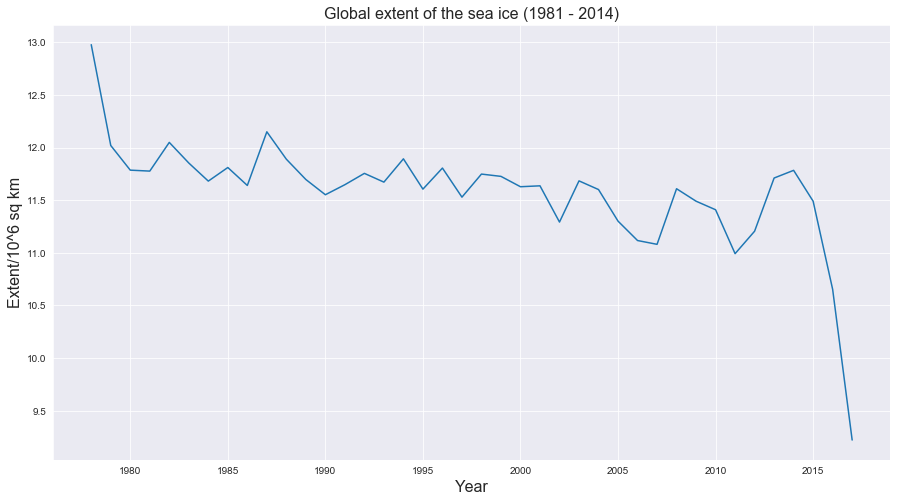

In [30]:
# Using moving averages to smooth the line and see the trend clearly

ice_mov = sea_mean.rolling(window=1).mean()

plt.figure(figsize=(15, 8))
sns.set_style("darkgrid")
sns.lineplot(x='Year', 
             y='Extent', 
             data=ice_mov)
plt.title('Global extent of the sea ice (1981 - 2014)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Extent/10^6 sq km', fontsize=16)

Text(0, 0.5, 'Extent/10^6 sq km')

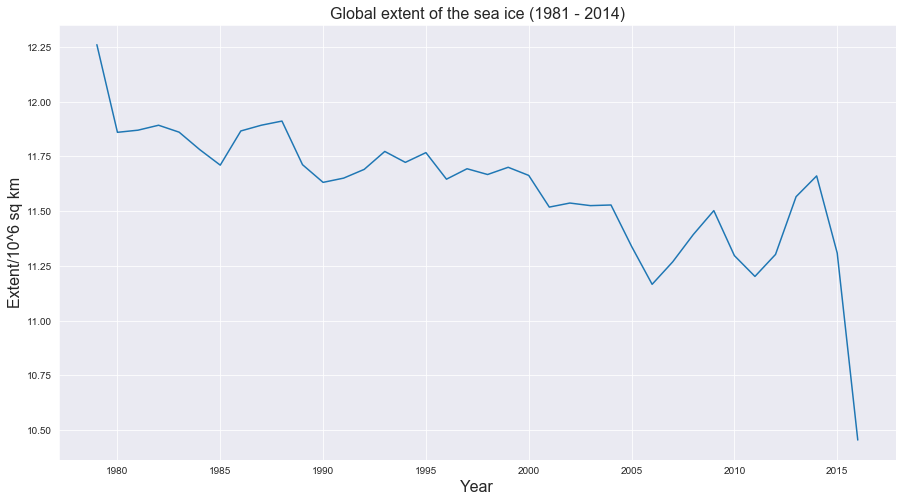

In [31]:
# Trying different windows

ice_mov = sea_mean.rolling(window=3).mean()

plt.figure(figsize=(15, 8))
sns.set_style("darkgrid")
sns.lineplot(x='Year', 
             y='Extent', 
             data=ice_mov)
plt.title('Global extent of the sea ice (1981 - 2014)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Extent/10^6 sq km', fontsize=16)

Text(0, 0.5, 'Extent/10^6 sq km')

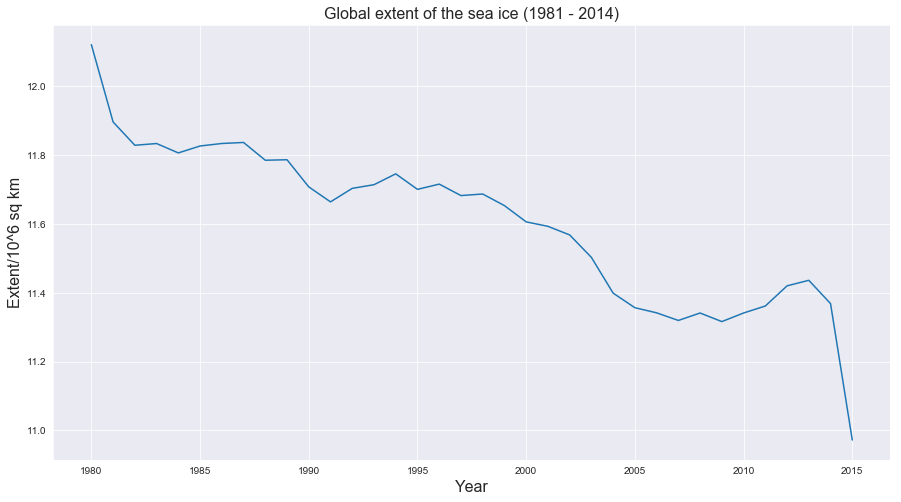

In [32]:
ice_mov = sea_mean.rolling(window=5).mean()

plt.figure(figsize=(15, 8))
sns.set_style("darkgrid")
sns.lineplot(x='Year', 
             y='Extent', 
             data=ice_mov)
plt.title('Global extent of the sea ice (1981 - 2014)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Extent/10^6 sq km', fontsize=16)

## Analysis by hemispheres

In [33]:
"""Using the original dataset because it contains days and months that we dropped in the previous 
analysis because we didn\'t have that information for the CO2 and temperature dataset."""

old = pd.read_csv('/Users/anna/data/climate-change/datasets/seaice.csv')
old.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north


In [35]:
old = old[['Year', 'Month', 'Extent', 'hemisphere']]
old.head()

,Year,Month,Extent,hemisphere
0,1978,10,10.231,north
1,1978,10,10.420,north
2,1978,10,10.557,north
3,1978,11,10.670,north
4,1978,11,10.777,north


In [36]:
# Removing years with missing information
old = old[(old.Year < 2017) & (old.Year > 1978)].reset_index(drop=True)
old.head()

,Year,Month,Extent,hemisphere
0,1979,1,14.997,north
1,1979,1,14.922,north
2,1979,1,14.929,north
3,1979,1,14.968,north
4,1979,1,15.190,north


## Separating data by hemisphere

In [37]:
# Creating 2 different datasets
north = old[old['hemisphere']== 'north']
south = old[old['hemisphere']== 'south']

In [39]:
# Prep for moving averages
north_g = north.groupby(['Month', 'Year']).mean().reset_index()
south_g = south.groupby(['Month', 'Year']).mean().reset_index()

## Arctic

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0, 0.5, 'Extent/10^6 sq km')

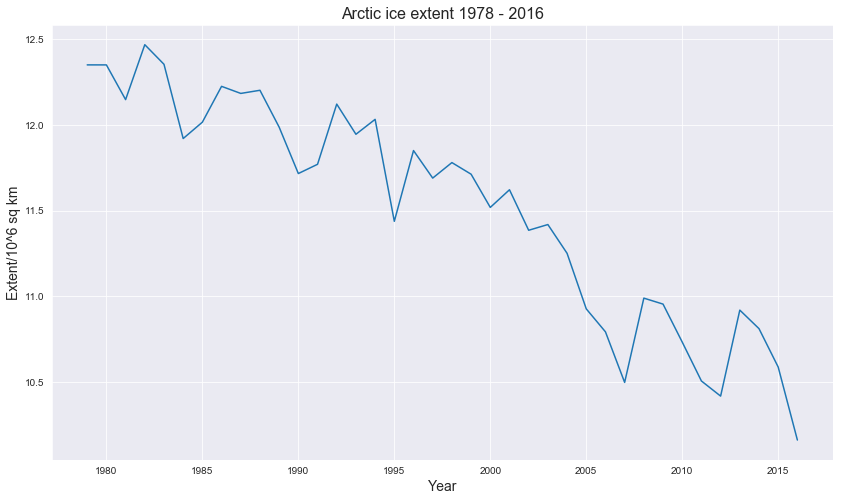

In [40]:
north_mov = north_g.rolling(window=1).mean()

plt.figure(figsize=(14, 8))
sns.set_style("darkgrid")
sns.lineplot(x='Year', 
             y='Extent', 
             err_style=None,
             data=north_mov)
plt.title('Arctic ice extent 1978 - 2016', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Extent/10^6 sq km', fontsize=14)

Text(0, 0.5, 'Extent/10^6 sq km')

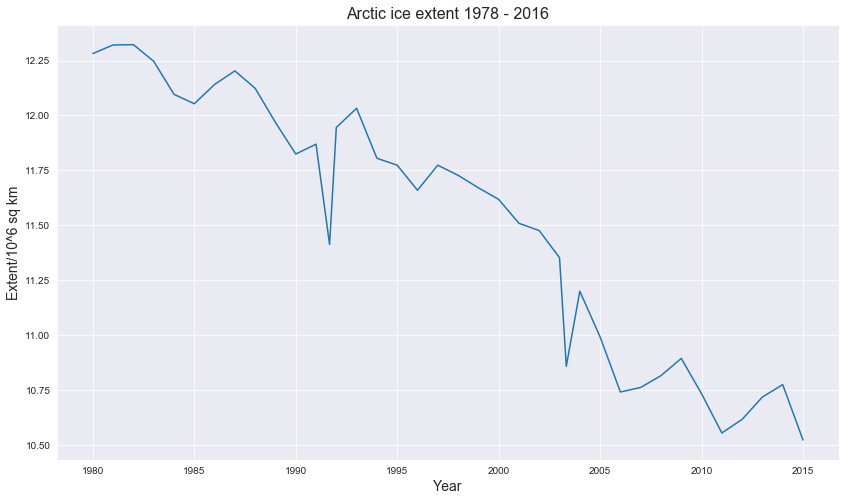

In [41]:
north_mov = north_g.rolling(window=3).mean()

plt.figure(figsize=(14, 8))
sns.set_style("darkgrid")
sns.lineplot(x='Year', 
             y='Extent', 
             err_style=None,
             data=north_mov)
plt.title('Arctic ice extent 1978 - 2016', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Extent/10^6 sq km', fontsize=14)

## Antarctica

Text(0, 0.5, '10^6 sq km')

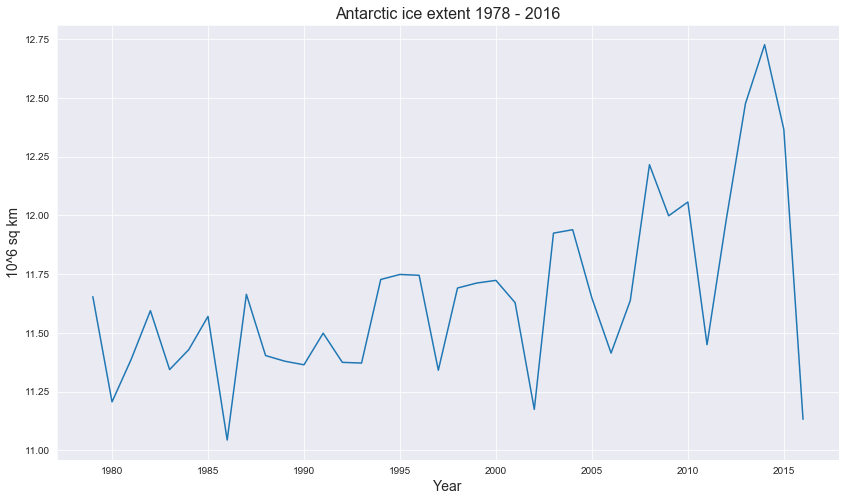

In [45]:
south_mov = south_g.rolling(window=1).mean()

plt.figure(figsize=(14, 8))
sns.set_style("darkgrid")
sns.lineplot(x='Year', 
             y='Extent', 
             err_style=None,
             data=south_mov)
plt.title('Antarctic ice extent 1978 - 2016', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('10^6 sq km', fontsize=14)

Text(0, 0.5, '10^6 sq km')

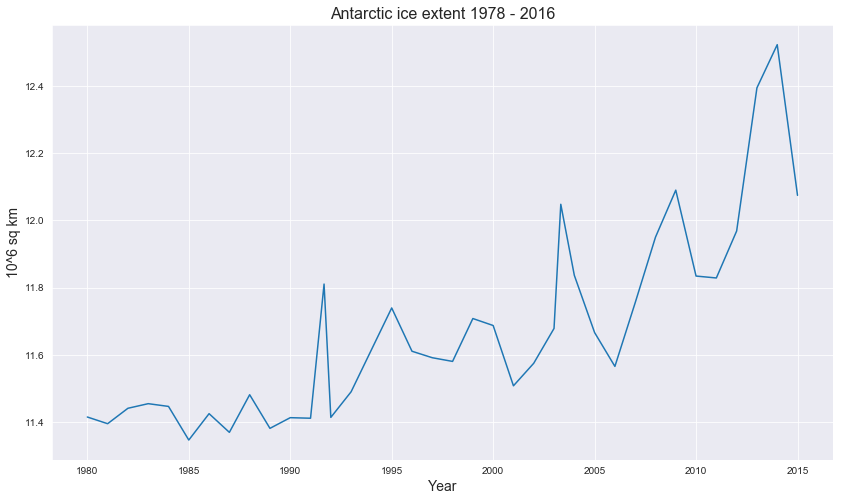

In [47]:
south_mov = south_g.rolling(window=3).mean()

plt.figure(figsize=(14, 8))
sns.set_style("darkgrid")
sns.lineplot(x='Year', 
             y='Extent', 
             err_style=None,
             data=south_mov)
plt.title('Antarctic ice extent 1978 - 2016', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('10^6 sq km', fontsize=14)

Text(0, 0.5, 'Extent/10^6 sq km')

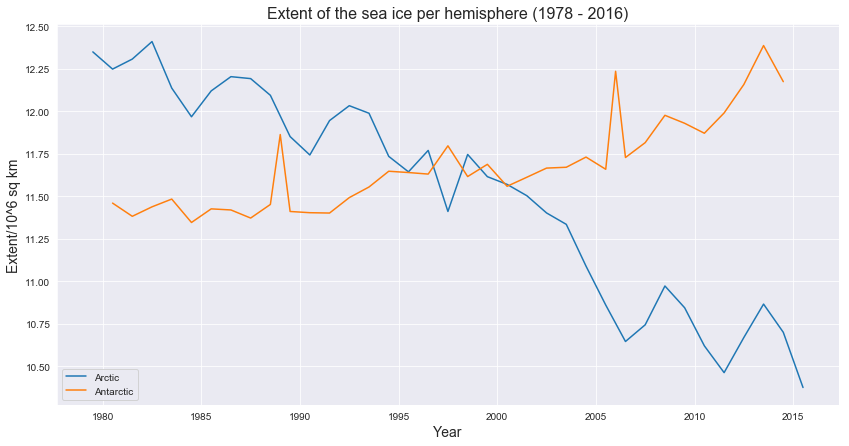

In [51]:
# Plotting Arctic and Antarctic in the same graph

north_mov = north_g.rolling(window=2).mean()
south_mov = south_g.rolling(window=4).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x="Year", y="Extent", err_style=None, data=north_mov, label='Arctic')
sns.lineplot(x="Year", y="Extent", err_style=None, data=south_mov, label='Antarctic')
plt.title('Extent of the sea ice per hemisphere (1978 - 2016)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Extent/10^6 sq km', fontsize=14)

In [53]:
# Calculating annual mean of the ice extent per hemisphere
north_ice = north.groupby('Year').mean().reset_index()
north_mean = north_ice[['Year', 'Extent']]

south_ice = south.groupby('Year').mean().reset_index()
south_mean = south_ice[['Year', 'Extent']]

north_mean.to_csv('/Users/anna/data/climate-change/datasets/north_mean.csv', index=False)
south_mean.to_csv('/Users/anna/data/climate-change/datasets/south_mean.csv', index=False)

# Results

The global extent of the sea ice seems to be decreasing, but not as much as we thought if we expect the behaviour of the sea ice to be related with the carbon dioxide and temperature.

When plotting the Arctic and the Antarctic in different lines, we see that the Arctic is decreasing, but the Antarctic is actually gaining ice, which is making the global trend not decrease as much as expected.